In [3]:
%matplotlib inline

import pandas as pd
from sklearn import ensemble
import numpy as np 


# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#for plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
loc_train = "./data/train.csv"
loc_test = "./data/test.csv"
loc_submission = "./data/submission.csv"

df_train = pd.read_csv(loc_train)
df_test = pd.read_csv(loc_test)

In [5]:
#### file with labels 
loc_test_label = "./data/final.csv"
### file with labels 
df_final_test = pd.read_csv(loc_test_label)
print df_final_test.shape

(565892, 55)


In [168]:
feature_cols = [col for col in df_train.columns if col not in ['Cover_Type','Id']]

df_train = df_train.iloc[np.random.permutation(len(df_train))]
df_train = df_train.reset_index(drop=True)

X = df_train[feature_cols]
Y = df_train['Cover_Type']
train_ids = df_train['Id']

test_data = df_test[feature_cols]
test_ids = df_test['Id']

# Check that the shapes look right.
print X.shape, test_data.shape

(15120, 54) (565892, 54)


['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
(15120, 54) (565892, 54)

In [37]:
final_test_data = df_final_test[feature_cols]
final_test_labels = df_final_test['Cover_Type']
print final_test_data.shape

(565892, 54)


In [38]:
train_data, train_labels = X[:12120], Y[:12120]
dev_data, dev_labels = X[12120:], Y[12120:]
print train_data.shape
print dev_data.shape,dev_labels.shape

(12120, 54)
(3000, 54) (3000,)


This section is trying which classifier works better knn or random forest and with what parameters

In [14]:
pipelineKnn = Pipeline([
                ('kNN', KNeighborsClassifier())
            ])

pipelineRandom = Pipeline([
                ('randomForest' , ensemble.RandomForestClassifier(random_state=0))
            ])

pipelineExtra = Pipeline([
        ('extraTrees',ExtraTreesClassifier(max_depth=None,min_samples_split=2, random_state=0))
    ])

parametersKnn = {
        'kNN__n_neighbors': (1,3,5,7,10,20,30,50)
            }

parametersRandom = {
            'randomForest__n_estimators':(50,100,150,200,250,300,350,400)
        }

parametersExtra = {
    'extraTrees__n_estimators':(50,100,150,200,250,300,350,400)
}


param = [parametersKnn,parametersRandom,parametersExtra]
pipe = [pipelineKnn,pipelineRandom,pipelineExtra]

print("\nPerforming grid search...")
for i in range(len(param)):
    # initialize grid search
    grid_search = GridSearchCV(pipe[i], param[i], n_jobs=-1)
    grid_search.fit(train_data,train_labels)
    print("\n")
    print("pipeline:", [name for name, _ in pipe[i].steps])
    print("parameters:" ,param[i])
    print("\nBest score: {:0.3f}".format(grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param[i].keys()):
        print("\t{}: {}".format(param_name, best_parameters[param_name]))
    y_true, y_pred = dev_labels, grid_search.predict(dev_data)
    print"f1 score on dev data: ",(metrics.f1_score(y_true, y_pred))
    print("Grid scores on Dev  data:")
    for params, mean_score, scores in grid_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))





Performing grid search...


('pipeline:', ['kNN'])
('parameters:', {'kNN__n_neighbors': (1, 3, 5, 7, 10, 20, 30, 50)})

Best score: 0.819
Best parameters set:
	kNN__n_neighbors: 1
f1 score on dev data:  0.83385384588
Grid scores on Dev  data:
0.819 (+/-0.004) for {'kNN__n_neighbors': 1}
0.787 (+/-0.005) for {'kNN__n_neighbors': 3}
0.773 (+/-0.003) for {'kNN__n_neighbors': 5}
0.761 (+/-0.009) for {'kNN__n_neighbors': 7}
0.745 (+/-0.004) for {'kNN__n_neighbors': 10}
0.716 (+/-0.004) for {'kNN__n_neighbors': 20}
0.697 (+/-0.003) for {'kNN__n_neighbors': 30}
0.665 (+/-0.011) for {'kNN__n_neighbors': 50}


('pipeline:', ['randomForest'])
('parameters:', {'randomForest__n_estimators': (50, 100, 150, 200, 250, 300, 350, 400)})

Best score: 0.847
Best parameters set:
	randomForest__n_estimators: 200
f1 score on dev data:  0.861837385217
Grid scores on Dev  data:
0.842 (+/-0.010) for {'randomForest__n_estimators': 50}
0.844 (+/-0.009) for {'randomForest__n_estimators': 100}
0.847 (+/-0.011) fo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)  
with open(loc_submission, "w") as outfile:
    outfile.write("Id,Cover_Type\n")
    for e, val in enumerate(list(knn.predict(test_data))):
        outfile.write("%s,%s\n"%(test_ids[e],val))

In [39]:
clf = ensemble.RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=0)
clf.fit(train_data,train_labels)
#accuracy of dev data data 
acc= clf.score(dev_data,dev_labels)
print acc

clf1 = ExtraTreesClassifier(n_estimators=90, max_depth=None,min_samples_split=1, random_state=0)
clf1.fit(train_data,train_labels)
#accuracy of dev data data 
acc= clf1.score(dev_data,dev_labels)
print acc

0.848666666667
0.850666666667


In [40]:
#accuracy on final test set 
acc= clf.score(dev_data,dev_labels)
acc= clf.score(final_test_data,final_test_labels)
print acc

0.739054448552


Plotting the training data features

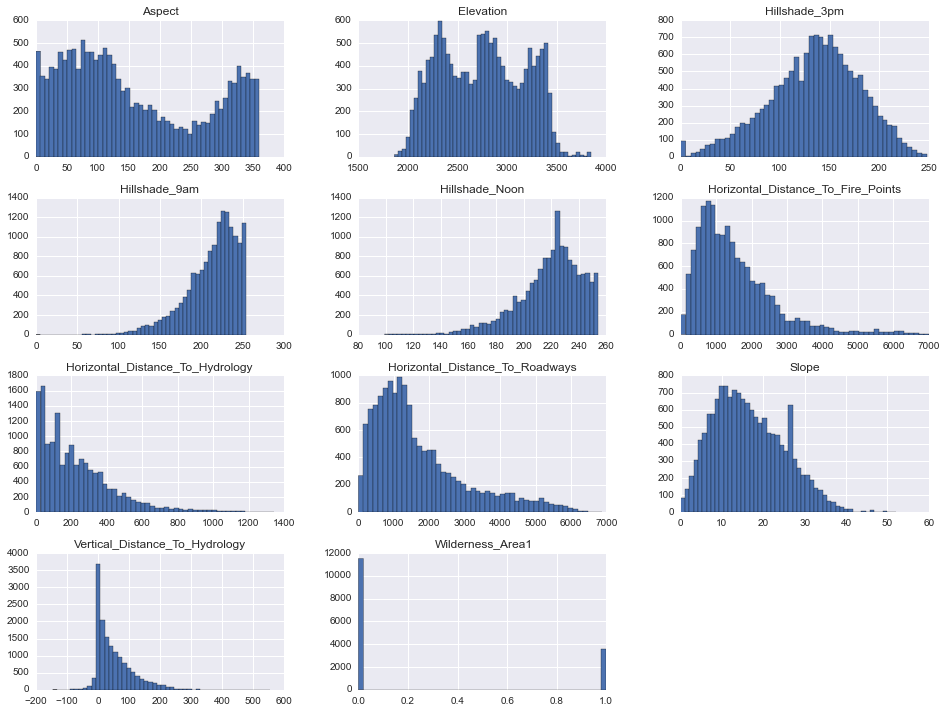

In [15]:
# Create a new figure and set the figsize argument so we get square-ish plots of the features. 
X.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

Plotting the final test data features

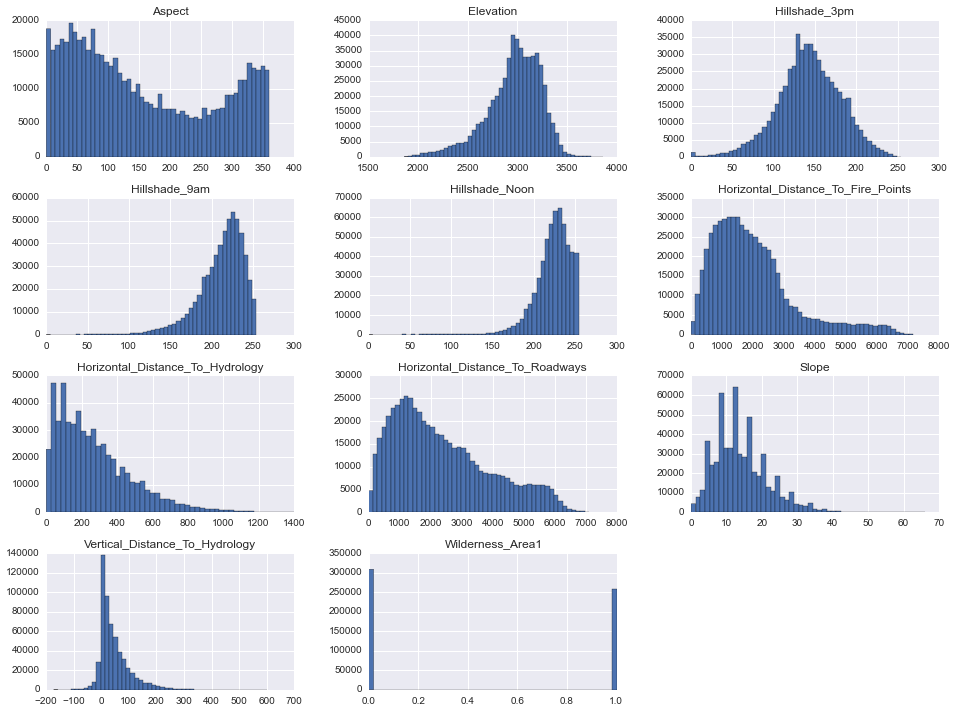

In [16]:
final_test_data.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

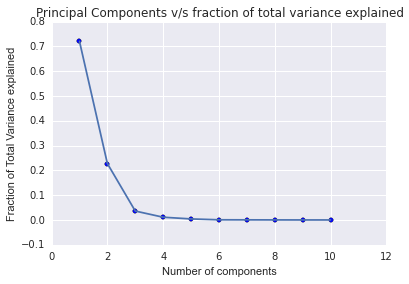

In [55]:
# trying principal component analysis 
prin_comp = 10
sklearn_pca = PCA(n_components=prin_comp)
sklearn_transf = sklearn_pca.fit(train_data)
plt.title("Principal Components v/s fraction of total variance explained")
plt.plot(np.r_[1:prin_comp+1],sklearn_transf.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Fraction of Total Variance explained')
plt.scatter( np.r_[1:prin_comp+1],sklearn_transf.explained_variance_ratio_)
plt.show()


In [66]:
# trying PCA doesnt improve
try:
    sklearn_pca = PCA(n_components=5)
    sklearn_transf = sklearn_pca.fit_transform(train_data)
    pca_test = sklearn_pca.fit_transform(dev_data)
    clf = ensemble.RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=0)
    clf.fit(sklearn_transf,train_labels)
    #accuracy of dev data data 
    acc= clf.score(pca_test,dev_labels)
    print acc
except Exception as e:
        print "Exception Occured: ", e.args
        raise

0.398666666667


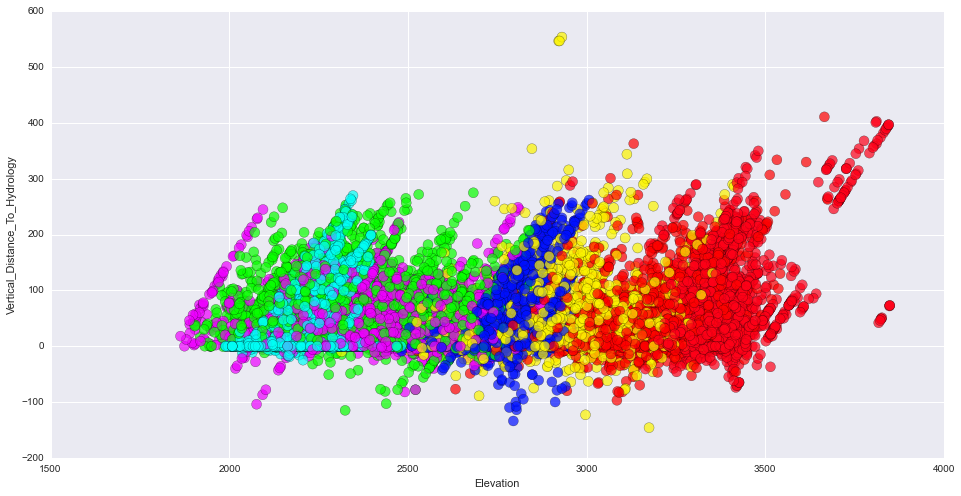

In [17]:
from IPython.display import Image

def plotc(c1,c2):
    
    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(Y))
    
    plt.scatter(c1, c2, c=sel, s=100,cmap=plt.cm.hsv,alpha=0.7)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
    
plotc(df_train.Elevation, df_train.Vertical_Distance_To_Hydrology)

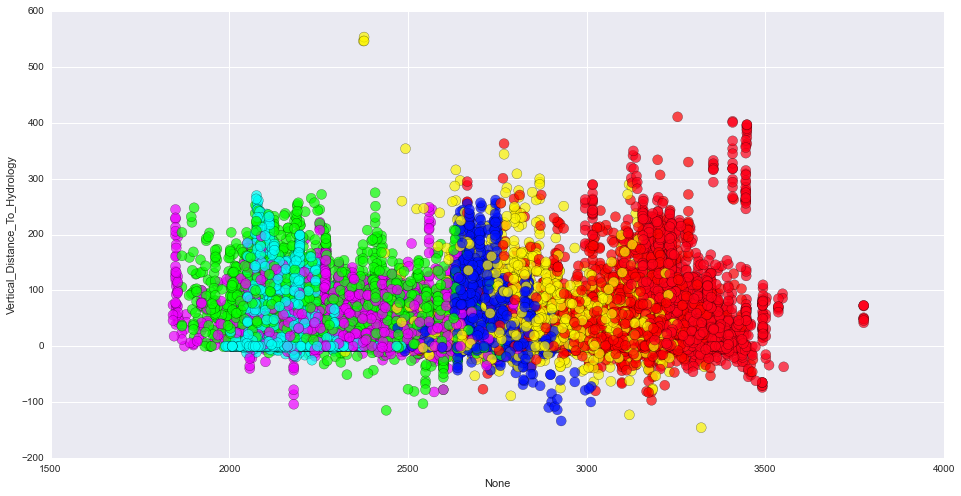

In [18]:
plotc(df_train.Elevation-df_train.Vertical_Distance_To_Hydrology, df_train.Vertical_Distance_To_Hydrology)

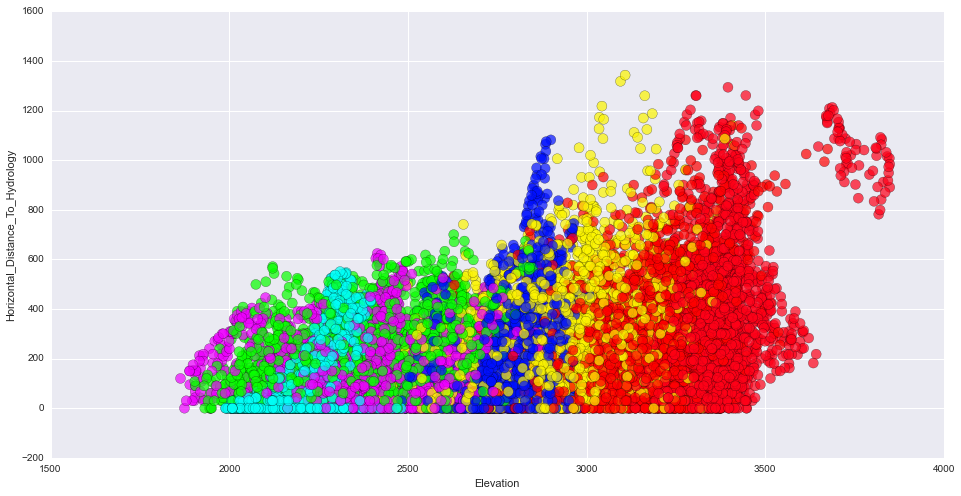

In [19]:
plotc(df_train.Elevation, df_train.Horizontal_Distance_To_Hydrology)

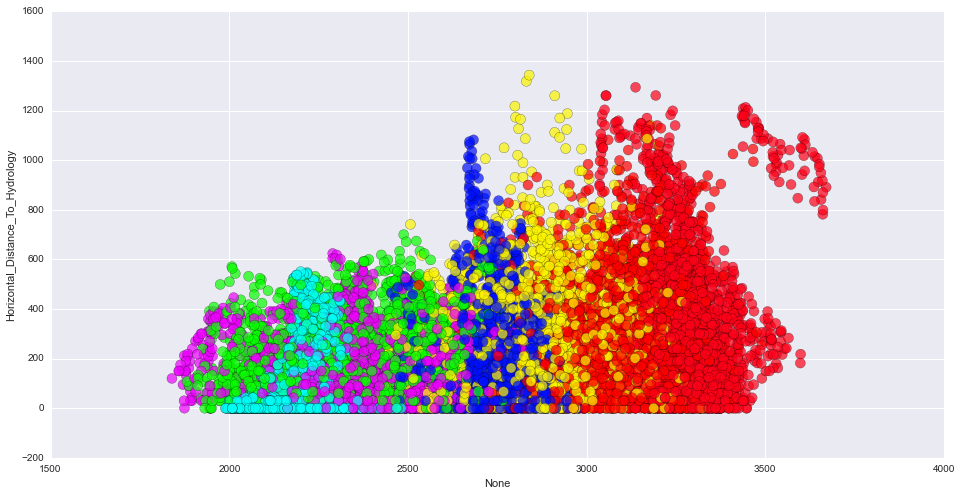

In [22]:
plotc(df_train.Elevation-df_train.Horizontal_Distance_To_Hydrology*0.2, df_train.Horizontal_Distance_To_Hydrology)

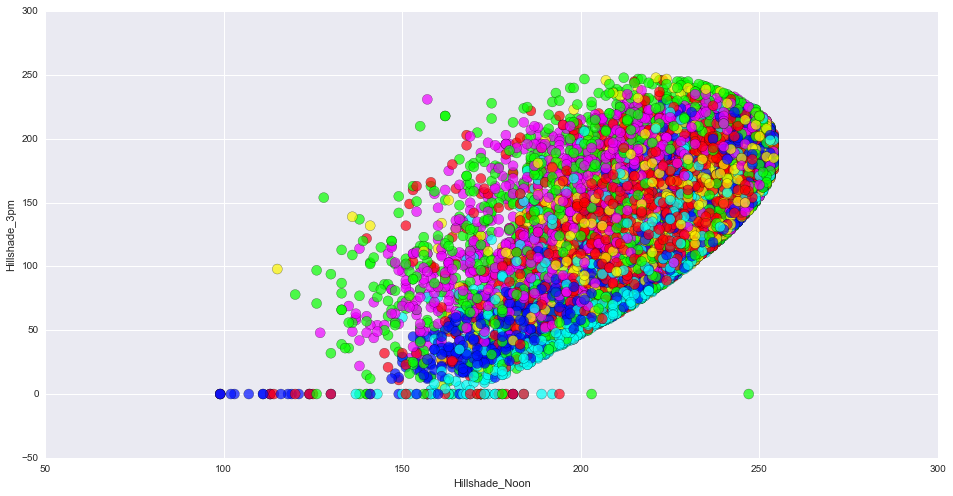

In [75]:
plotc(df_train.Hillshade_Noon, df_train.Hillshade_3pm)

In [169]:
byCover = df_train.groupby('Cover_Type')
median_3pm = np.array(byCover['Hillshade_3pm'].median())
median_9am = np.array(byCover['Hillshade_9am'].median())
print median_3pm
print median_9am
#byCover['Hillshade_9am'].describe()

[144 141 142 114 128 150 142]
[216 220 212 234 228 196 221]


In [182]:
print len(median_3pm)
for i in range(len(median_3pm)):
    zero_3pm = df_train[(df_train['Cover_Type']== i+1) & (df_train['Hillshade_3pm']== 0)].index.tolist()
    test = np.array(zero_3pm)
    print "3pm",i+1, test
    for j in range(len(test)):
        df_train['Hillshade_3pm'].loc[test[j]] = median_3pm[i]
    zero_9am = df_train[(df_train['Cover_Type']== i+1) & (df_train['Hillshade_9am']== 0)].index.tolist()
    test1 = np.array(zero_9am)
    print "9am",i+1,test1
    for j in range(len(test1)):
        df_train['Hillshade_3pm'].loc[test1[j]] = median_9am[i]
    

7
3pm 1 []
9am 1 []
3pm 2 []
9am 2 []
3pm 3 []
9am 3 []
3pm 4 []
9am 4 []
3pm 5 []
9am 5 []
3pm 6 []
9am 6 [3679]
3pm 7 []
9am 7 []


Preprocessing the data 

In [41]:
# pre processing of data 
# use pythogorean theorem to compute to new variable distance to hydrology
X['dist_hydro'] = np.sqrt(np.square(X['Horizontal_Distance_To_Hydrology'])+ np.square(X['Vertical_Distance_To_Hydrology']^2))

#combine wilderness area to one column
#for i in range (X.shape[0]):
X['wilderness_area'] = (X.Wilderness_Area1*1) + (X.Wilderness_Area2*2) + (X.Wilderness_Area3*3) + (X.Wilderness_Area4*4)

#combine soil types into one column
X['soil_type'] = (X.Soil_Type1*1)+ (X.Soil_Type2*2)+ (X.Soil_Type3*3)+ (X.Soil_Type4*4)+ (X.Soil_Type5*5)+ (X.Soil_Type6*6) +(X.Soil_Type7*7)+ (X.Soil_Type8*8) + (X.Soil_Type9*9)  + (X.Soil_Type10*10) + (X.Soil_Type11*11) + (X.Soil_Type12*12) +(X.Soil_Type13*13)+(X.Soil_Type14*14)+ (X.Soil_Type15*15)+(X.Soil_Type16*16)+(X.Soil_Type17*17)+(X.Soil_Type18*18)+(X.Soil_Type19*19)+(X.Soil_Type20*20)+(X.Soil_Type21*21)+(X.Soil_Type22*22)+(X.Soil_Type23*23)+(X.Soil_Type24*24)+(X.Soil_Type25*25)+(X.Soil_Type26*26)+(X.Soil_Type27*27)+(X.Soil_Type28*28)+(X.Soil_Type29*29)+(X.Soil_Type30*30)+(X.Soil_Type31*31)+(X.Soil_Type32*32)+(X.Soil_Type33*33)+(X.Soil_Type34*34)+(X.Soil_Type35*35)+(X.Soil_Type36*36)+(X.Soil_Type37*37)+(X.Soil_Type38*38)+(X.Soil_Type39*39)+(X.Soil_Type40*40)

# is water source below based on Vertical hydrology 
X['is_below'] = X.Vertical_Distance_To_Hydrology < 0

#convert elevation to log scale 
X['lElevation'] = np.log10(X.Elevation)

#aspect - make it in 0 to 360 range
X['aspect2'] = np.mod((X.Aspect+180), 360)

#combine elevation with Vertical 
X['ele_vert_hrydo_sum'] = X.Elevation + X.Vertical_Distance_To_Hydrology

#diff elevation with Vertical 
X['ele_vert_hrydo_diff'] = X.Elevation - X.Vertical_Distance_To_Hydrology


#diff elevation with horizontal 
X['ele_hor_hydo_diff'] = X.Elevation - X.Horizontal_Distance_To_Hydrology*0.2

#elevation & horizontal sum
X['ele_hor_hydo_sum'] = X.Elevation + X.Horizontal_Distance_To_Hydrology

X['hor_hydro_road_sum'] = X.Horizontal_Distance_To_Hydrology + X.Horizontal_Distance_To_Roadways

X['hor_hydro_road_diff'] = np.abs(X.Horizontal_Distance_To_Hydrology - X.Horizontal_Distance_To_Roadways)


X['hor_hydro_fire_sum'] = X.Horizontal_Distance_To_Hydrology + X.Horizontal_Distance_To_Fire_Points

X['hor_hydro_fire_diff'] = np.abs(X.Horizontal_Distance_To_Hydrology - X.Horizontal_Distance_To_Fire_Points)


/Users/hetal/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [50]:
# final test data modifcations 
# pre processing of data 
# use pythogorean theorem to compute to new variable distance to hydrology
final_test_data['dist_hydro'] = np.sqrt(np.square(final_test_data['Horizontal_Distance_To_Hydrology'])+ np.square(final_test_data['Vertical_Distance_To_Hydrology']^2))

#combine wilderness area to one column
#for i in range (final_test_data.shape[0]):
final_test_data['wilderness_area'] = (final_test_data.Wilderness_Area1*1) + (final_test_data.Wilderness_Area2*2) + (final_test_data.Wilderness_Area3*3) + (final_test_data.Wilderness_Area4*4)

#combine soil types into one column
final_test_data['soil_type'] = (final_test_data.Soil_Type1*1)+ (final_test_data.Soil_Type2*2)+ (final_test_data.Soil_Type3*3)+ (final_test_data.Soil_Type4*4)+ (final_test_data.Soil_Type5*5)+ (final_test_data.Soil_Type6*6) +(final_test_data.Soil_Type7*7)+ (final_test_data.Soil_Type8*8) + (final_test_data.Soil_Type9*9)  + (final_test_data.Soil_Type10*10) + (final_test_data.Soil_Type11*11) + (final_test_data.Soil_Type12*12) +(final_test_data.Soil_Type13*13)+(final_test_data.Soil_Type14*14)+ (final_test_data.Soil_Type15*15)+(final_test_data.Soil_Type16*16)+(final_test_data.Soil_Type17*17)+(final_test_data.Soil_Type18*18)+(final_test_data.Soil_Type19*19)+(final_test_data.Soil_Type20*20)+(final_test_data.Soil_Type21*21)+(final_test_data.Soil_Type22*22)+(final_test_data.Soil_Type23*23)+(final_test_data.Soil_Type24*24)+(final_test_data.Soil_Type25*25)+(final_test_data.Soil_Type26*26)+(final_test_data.Soil_Type27*27)+(final_test_data.Soil_Type28*28)+(final_test_data.Soil_Type29*29)+(final_test_data.Soil_Type30*30)+(final_test_data.Soil_Type31*31)+(final_test_data.Soil_Type32*32)+(final_test_data.Soil_Type33*33)+(final_test_data.Soil_Type34*34)+(final_test_data.Soil_Type35*35)+(final_test_data.Soil_Type36*36)+(final_test_data.Soil_Type37*37)+(final_test_data.Soil_Type38*38)+(final_test_data.Soil_Type39*39)+(final_test_data.Soil_Type40*40)

# is water source below based on Vertical hydrology 
final_test_data['is_below'] = final_test_data.Vertical_Distance_To_Hydrology < 0

#convert elevation to log scale 
final_test_data['lElevation'] = np.log10(final_test_data.Elevation)

#aspect - make it in 0 to 360 range
final_test_data['aspect2'] = np.mod((final_test_data.Aspect+180), 360)

#combine elevation with Vertical 
final_test_data['ele_vert_hrydo_sum'] = final_test_data.Elevation + final_test_data.Vertical_Distance_To_Hydrology

#diff elevation with Vertical 
final_test_data['ele_vert_hrydo_diff'] = final_test_data.Elevation - final_test_data.Vertical_Distance_To_Hydrology


#diff elevation with horizontal 
final_test_data['ele_hor_hydo_diff'] = final_test_data.Elevation - final_test_data.Horizontal_Distance_To_Hydrology*0.2

#elevation & horizontal sum
final_test_data['ele_hor_hydo_sum'] = final_test_data.Elevation + final_test_data.Horizontal_Distance_To_Hydrology

final_test_data['hor_hydro_road_sum'] = final_test_data.Horizontal_Distance_To_Hydrology + final_test_data.Horizontal_Distance_To_Roadways

final_test_data['hor_hydro_road_diff'] = np.abs(final_test_data.Horizontal_Distance_To_Hydrology - final_test_data.Horizontal_Distance_To_Roadways)


final_test_data['hor_hydro_fire_sum'] = final_test_data.Horizontal_Distance_To_Hydrology + final_test_data.Horizontal_Distance_To_Fire_Points

final_test_data['hor_hydro_fire_diff'] = np.abs(final_test_data.Horizontal_Distance_To_Hydrology - final_test_data.Horizontal_Distance_To_Fire_Points)





In [51]:
feature_sel = ['Slope', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','dist_hydro', 'is_below', 'lElevation', 'aspect2',
       'ele_vert_hrydo_sum', 'ele_vert_hrydo_diff','hor_hydro_road_sum','hor_hydro_road_diff','hor_hydro_fire_sum',
        'hor_hydro_fire_diff','wilderness_area','soil_type']
X1 = X[feature_sel]
print X1.columns
train_data1, train_labels1 = X1[:12120], Y[:12120]
dev_data1, dev_labels1 = X1[12120:], Y[12120:]

Index([u'Slope', u'Horizontal_Distance_To_Roadways', u'Hillshade_9am',
       u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'dist_hydro', u'is_below',
       u'lElevation', u'aspect2', u'ele_vert_hrydo_sum',
       u'ele_vert_hrydo_diff', u'hor_hydro_road_sum', u'hor_hydro_road_diff',
       u'hor_hydro_fire_sum', u'hor_hydro_fire_diff', u'wilderness_area',
       u'soil_type'],
      dtype='object')


In [72]:
train_data1, train_labels1 = X1[:12120], Y[:12120]
dev_data1, dev_labels1 = X1[12120:], Y[12120:]

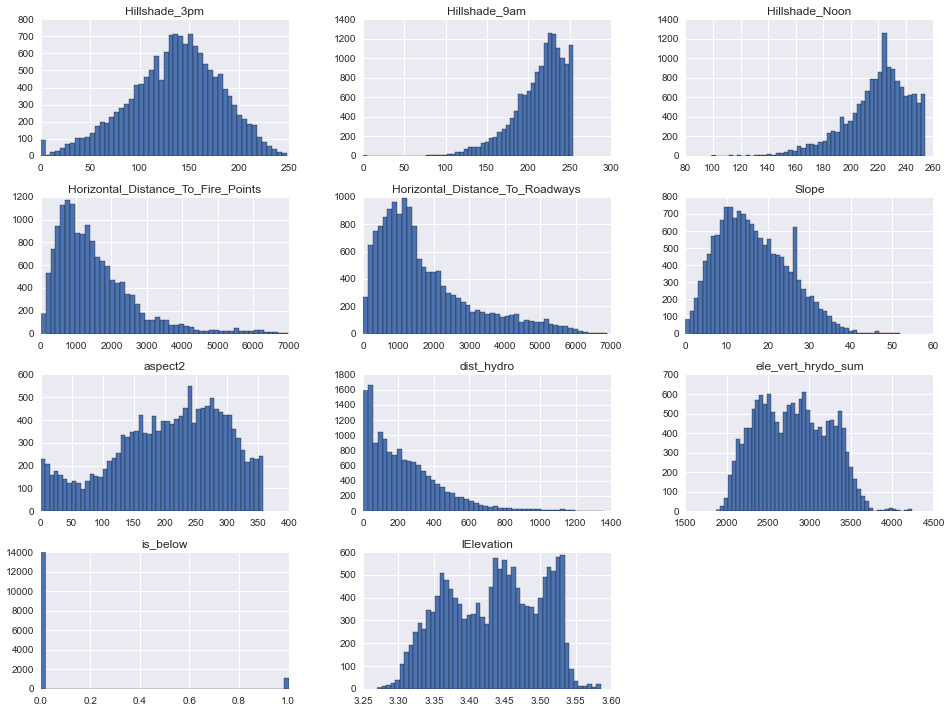

In [44]:
X1.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

In [73]:
clf_cols = [col for col in train_data1.columns]
clf = ensemble.RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=0)
clf.fit(train_data1,train_labels)
#accuracy of dev data data 
acc= clf.score(dev_data1,dev_labels)
print acc
feature_imp = clf.feature_importances_
print "Feature importance in Random Forest"
for i in range(len(clf_cols)):
    print clf_cols[i],':',feature_imp[i]

clf1 = ExtraTreesClassifier(n_estimators=200, max_features =10,max_depth=None,min_samples_split=1, random_state=0)
clf1.fit(train_data1,train_labels)
#accuracy of dev data data 
acc= clf1.score(dev_data1,dev_labels)
feature_imp = clf1.feature_importances_
print "\n",acc
print "Feature importance in Extremely random trees"
for i in range(len(clf_cols)):
    print clf_cols[i],':',feature_imp[i]
pd.DataFrame(forest.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:10]


0.866666666667
Feature importance in Random Forest
Slope : 0.0217052422887
Horizontal_Distance_To_Roadways : 0.0466514111249
Hillshade_9am : 0.0408566095977
Hillshade_Noon : 0.0303726493807
Hillshade_3pm : 0.0277845151622
Horizontal_Distance_To_Fire_Points : 0.0386792808667
dist_hydro : 0.0517013638556
is_below : 0.0017851825714
lElevation : 0.131793435472
aspect2 : 0.0412332499522
ele_vert_hrydo_sum : 0.0886653246025
ele_vert_hrydo_diff : 0.154331918794
hor_hydro_road_sum : 0.0445023016048
hor_hydro_road_diff : 0.0479495051613
hor_hydro_fire_sum : 0.0411545546011
hor_hydro_fire_diff : 0.0372742015652
wilderness_area : 0.042161763784
soil_type : 0.111397489615

0.886666666667
Feature importance in Extremely random trees
Slope : 0.0226008085064
Horizontal_Distance_To_Roadways : 0.0409583705138
Hillshade_9am : 0.0393349667744
Hillshade_Noon : 0.0294344264268
Hillshade_3pm : 0.0250562141453
Horizontal_Distance_To_Fire_Points : 0.0363951829282
dist_hydro : 0.0478786522379
is_below : 0.0059

NameError: name 'forest' is not defined

In [52]:
test_data_1 = final_test_data[feature_sel]
clf1 = ExtraTreesClassifier(n_estimators=200, max_features =10,max_depth=None,min_samples_split=1, random_state=0)
clf1.fit(train_data1,train_labels)

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=None, max_features=10,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=1, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0)

In [32]:
acc= clf1.score(test_data_1,final_test_labels)
print "\n",acc



0.792444494709


In [ ]:
with open(loc_submission, "w") as outfile:
    outfile.write("Id,Cover_Type\n")
    for e, val in enumerate(list(knn.predict(test_data))):
        outfile.write("%s,%s\n"%(test_ids[e],val))

In [47]:
np.mod((50+180), 360)

230

In [67]:
forest_type = np.unique(df_train.Cover_Type)
print forest_type
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(forest_type))
    plt.xticks(tick_marks, forest_type, rotation=45)
    plt.yticks(tick_marks, forest_type)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 

[1 2 3 4 5 6 7]


Confusion matrix, without normalization
[[169409  28536     51      0   2806    519   8359]
 [ 41288 207815   5762     36  17831   7149   1260]
 [     1    225  29656   1187    281   2244      0]
 [     0      0      6    575      0      6      0]
 [     5     99     69      0   7134     26      0]
 [     3     44    904    310     61  13885      0]
 [   368     30      0      0      6      0  17946]]


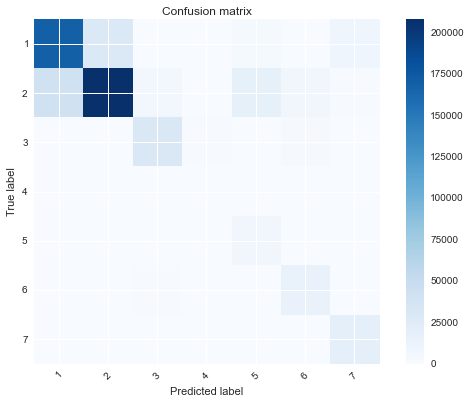

In [61]:
from sklearn.metrics import confusion_matrix

y_pred = clf1.predict(test_data_1)
cm = confusion_matrix(final_test_labels, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

Confusion matrix, without normalization
[[169409  28536     51      0   2806    519   8359]
 [ 41288 207815   5762     36  17831   7149   1260]
 [     1    225  29656   1187    281   2244      0]
 [     0      0      6    575      0      6      0]
 [     5     99     69      0   7134     26      0]
 [     3     44    904    310     61  13885      0]
 [   368     30      0      0      6      0  17946]]


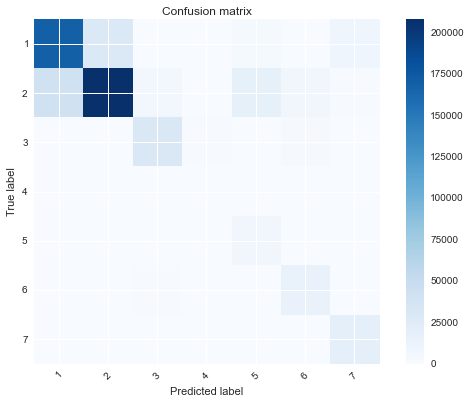

In [68]:
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)